# Project 1

Deadline: 3rd of November 2022

To do this project you have to complete this Jupyter notebook and send it via email or Discord.

The total number of points allocated for this project is 10.

You will need the following modules to solve the tasks:

In [1]:
import pandas as pd
import math
import numpy as np
from pprint import pprint
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import matplotlib.pyplot as plt

## I. Probabilities (1 point; 0.05 bonus points per week)

We will use the [penguin dataset](https://allisonhorst.github.io/palmerpenguins/articles/intro.html). The purpose is to predict the species of a penguin using multiple features such as its sex, weight, the habitant island etc.

In [2]:
penguin_dataset = pd.read_csv("data/penguins_filtered.csv")
penguin_dataset.head()

,sex,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,male,Torgersen,39.1,18.7,181.0,3750.0,Adelie
1,female,Torgersen,39.5,17.4,186.0,3800.0,Adelie
2,female,Torgersen,40.3,18.0,195.0,3250.0,Adelie
3,female,Torgersen,36.7,19.3,193.0,3450.0,Adelie
4,male,Torgersen,39.3,20.6,190.0,3650.0,Adelie


1. Create two variables, `species_values` and `island_values` that will store values of the two random variables "Species" and "Island". (*Hint*: `numpy.unique`)

In [3]:
# solution here
species_values = np.unique(penguin_dataset['species'])
island_values = np.unique(penguin_dataset['island'])
print("species:",species_values)
print("islands:", island_values)

species: ['Adelie' 'Chinstrap' 'Gentoo']
islands: ['Biscoe' 'Dream' 'Torgersen']


2. Calculate the PMF of the two random variables.

In [4]:
# solution here
x = list()
for spe in species_values:
    x.append((spe, list(penguin_dataset['species']).count(spe)))
y = list()
for island in island_values:
    y.append((island, list(penguin_dataset['island']).count(island)))

pmf_x = [(spe[1]/len(penguin_dataset['species'])) for spe in x]
print(x)
print(pmf_x)
pmf_y = [(isl[1]/len(penguin_dataset['island'])) for isl in y]
print(y)
print(pmf_y)


[('Adelie', 146), ('Chinstrap', 68), ('Gentoo', 119)]
[0.43843843843843844, 0.2042042042042042, 0.35735735735735735]
[('Biscoe', 163), ('Dream', 123), ('Torgersen', 47)]
[0.4894894894894895, 0.36936936936936937, 0.14114114114114115]


3. We know that $P(Species = Gentoo, Island = Dream) = 0.20$ and $P(Species = Gentoo, Island = Torgersen) = 0.05735735$. Knowing that the penguin is from the Biscoe island, what is the probability that its species is Gentoo? (*Hint*: the formula of conditional probability and the law of total probability for multiple events)

In [5]:
# solution here
p_gentoo_dream = 0.2
p_gentoo_torgersen = 0.05735735

# ex anterior
p_gentoo = 0.35735735
p_biscoe = 0.4894894894894895
# P(gentoo,biscoe) = ??
# P(S = gentoo) = P(gentoo|dream)*P(dream) + P(gentoo|torgersen)*P(torgersen) + P(gentoo|bisoe)+P(biscoe)

# P(A,B) = P(A|B)*P(B)
# P(S = gentoo) = P(gentoo,dream) + P(gentoo, torgersen) + P(gentoo, biscoe)
# => P(gentoo, biscoe) = P(S = gentoo) - P(gentoo,dream) - P(gentoo, torgersen)

p_gentoo_biscoe = p_gentoo - p_gentoo_dream - p_gentoo_torgersen
p_g_b = p_gentoo_biscoe / p_biscoe  # p(GENTOO|BISCOE)
print("P( S = Gentoo, T = Biscoe) = ",p_gentoo_biscoe)
print(p_g_b)

P( S = Gentoo, T = Biscoe) =  0.1
0.20429447852760738


4. Calculate the average body mass of the penguins.

In [6]:
# solution here
mass_values = np.unique(penguin_dataset['body_mass_g'])

x_mass = list()
for mass in mass_values:
    x_mass.append((mass, list(penguin_dataset['body_mass_g']).count(mass)))

pmf_mass = [(mass[1]/len(penguin_dataset['body_mass_g'])) for mass in x_mass]

e_mass = 0
for i, mass in enumerate(mass_values):
    e_mass += mass_values[i] * pmf_mass[i]

print("E_mass =", e_mass, "grams")


E_mass = 4207.057057057059 grams


5. Calculate the variance of the distribution of penguins body mass.

In [7]:
# solution here
var_mass = 0
for i, mass in enumerate(mass_values):
    var_mass += (mass - e_mass) ** 2 * pmf_mass[i]

print("Var_mass =", var_mass)

Var_mass = 646425.4231709188


## II. Entropy (2.5 points; bonus 0.1 per week)

1. Create a function, `generate_probabilities`, that will take the observations of a discrete random variable and create the vector of probabilities that describe the PMF.

In [8]:
"""
Example: generate_probabilities([1,1,0,0,1,1,0,0,1,1]) should return [0.4, 0.6]
0.4 indicates P(X=0) and 0.6 P(X=1)

"""
def generate_probabilities(observations):
    observations.sort()
    x_values = np.unique(observations)
    pmf_x = [ (observations.count(value) / len(observations)) for value in x_values]
    return pmf_x


print(generate_probabilities([1,1,0,0,1,1,0,0,1,1]))

[0.4, 0.6]


2. Create a variable `pmf_species` that will store the probabilities for the target attribute "species" from the penguin dataset using the function from ex.1. 

In [9]:
# solution here
pmf_species = generate_probabilities(list(penguin_dataset['species']))
print(pmf_species)

[0.43843843843843844, 0.2042042042042042, 0.35735735735735735]


3. Create a function `calculate_entropy` that will take as argument the pmf of a discrete random variable and return its entropy. (*Hint*: use `math.log2` to calculate logarithms)

In [10]:
# be careful at the cases where a probability is 0
def calculate_entropy(probabilities):
    logarithms = lambda x: 0 if x == 0 else math.log2(x)
    return -sum(prob*logarithms(prob) for prob in probabilities)

4. Create a variable `total_entropy_species` that will store the entropy of the target attribute "species".

In [11]:
# solution here
total_entropy_species = calculate_entropy( generate_probabilities( list(penguin_dataset['species'] ) ) )
print(total_entropy_species)

1.5200835543530915


5. Create a function `calculate_conditional_entropy` that will calculate the average conditionally entropy $H(X|Y)$. The function takes three arguments: the dataset containing the observations, the feature that describes the discrete random variable $Y$ and the feature that describes the discrete random variables $X$.

*Hint*:
- iterate through every unique value of Y; for each value you should
    - calculate the probability of that value
    - filter the dataset to keep only that value for Y
    - calculate the specific conditional entropy $H(X|Y=val)$


In [12]:
def calculate_conditional_entropy(dataset, feature, target_feature):
    prob_target = generate_probabilities( list(dataset[target_feature]) )

    # for target in np.unique(dataset[target_feature]):
    #     print(f"p({target}) * H({feature}|Y={target}) = ")
    #     for ftr in np.unique(dataset[feature]):
    #         print(f"\th(X={ftr}|Y={target})")
    #     print("**********************************")

    h_feature_target = 0
    for i, target in enumerate(np.unique(dataset[target_feature])):
        # filter Y, use only lines with y = target
        filtret_x = list()
        for k in range(0, len( dataset[target_feature] )):
            # print(dataset[target_feature])
            if dataset[target_feature][k] == target:
                filtret_x.append( dataset[feature][k] )

        prob_feat_y_target = list()
        for j, ftr in enumerate(np.unique(dataset[feature])):
            # count lines with x = ftr
            count = filtret_x.count(ftr) 
            # add probab to prob_feat_y_target
            prob_feat_y_target.append(count/len(filtret_x))

        h_feat_y_target = calculate_entropy(prob_feat_y_target)
        h_feature_target += h_feat_y_target * prob_target[i]
    
    return h_feature_target


# calculate_conditional_entropy(penguin_dataset, "species", "island")

6. Create a function `calculate_information_gain` that will calculate the information gain $IG(H;Y)$ using the its definition and the functions `calculate_entropy` and `calculate_conditional_entropy`. The arguments are the same as in the `calculate_conditional_entropy` function.

In [13]:
def calculate_information_gain(dataset, feature, target_feature):
    h_feature = calculate_entropy( generate_probabilities(list(dataset[feature])) )
    h_feature_target = calculate_conditional_entropy(dataset, feature, target_feature)

    return h_feature - h_feature_target

7. Calculate the information gains $IG(species;island)$ and $IG(species;sex)$.

In [14]:
# solution here
print("IG(species,island) =", calculate_information_gain(penguin_dataset, "species", "island"))
print("IG(species,sex) =", calculate_information_gain(penguin_dataset, "species", "sex"))

IG(species,island) = 0.7418510895067658
IG(species,sex) = 0.00010530129858565829


8. Based on the results, which of the attributes "sex" and "island" achieve a more qualitative separation of the "species" target attribute?

*Answer here:* 
Deoarece IG(species,island) > IG(species,sex), intelegem ca atributul "island" ne ofera o separare mult mai amanuntita a speciilor datorita castigului de informatie mare. Cunoscand atributul "island", determinarea speciei este mai usoara.

## III. Decision Tree - the discrete case (3.5 points; bonus 0.15 per week)

1. Before running the ID3 algorihtm, we must quantify all the random variables. Quantify the "Species" target attribute using this following mapping: Adelie - 1, Chinstrap - 2, Gentoo - 3. (*Hint* check Panda's `replace` function.)

In [15]:
#solution here

penguin_dataset.replace({'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}, inplace=True)
penguin_dataset

,sex,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,male,Torgersen,39.1,18.7,181.0,3750.0,1
1,female,Torgersen,39.5,17.4,186.0,3800.0,1
2,female,Torgersen,40.3,18.0,195.0,3250.0,1
3,female,Torgersen,36.7,19.3,193.0,3450.0,1
4,male,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
328,male,Dream,55.8,19.8,207.0,4000.0,2
329,female,Dream,43.5,18.1,202.0,3400.0,2
330,male,Dream,49.6,18.2,193.0,3775.0,2
331,male,Dream,50.8,19.0,210.0,4100.0,2


2. Using OneHot Encoders, convert the features "sex" and "island" to numerical values. You should add the new columns at the beginning of the table and remove the old ones. (*Hint*: check Panda's `drop` method to remove a column.)

In [16]:
# solution here
from sklearn.preprocessing import OneHotEncoder
import numpy as np

features = ["sex", "island"]
enc = OneHotEncoder(sparse=False).fit(penguin_dataset[features])
new_features = pd.DataFrame(enc.transform(penguin_dataset[features]),
                            columns=np.hstack(enc.categories_))

penguin_dataset = penguin_dataset.drop(columns=['sex', 'island'])
penguin_dataset = pd.concat([new_features, penguin_dataset], axis=1)
penguin_dataset

,female,male,Biscoe,Dream,Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,0.0,1.0,0.0,0.0,1.0,39.1,18.7,181.0,3750.0,1
1,1.0,0.0,0.0,0.0,1.0,39.5,17.4,186.0,3800.0,1
2,1.0,0.0,0.0,0.0,1.0,40.3,18.0,195.0,3250.0,1
3,1.0,0.0,0.0,0.0,1.0,36.7,19.3,193.0,3450.0,1
4,0.0,1.0,0.0,0.0,1.0,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...,...,...,...
328,0.0,1.0,0.0,1.0,0.0,55.8,19.8,207.0,4000.0,2
329,1.0,0.0,0.0,1.0,0.0,43.5,18.1,202.0,3400.0,2
330,0.0,1.0,0.0,1.0,0.0,49.6,18.2,193.0,3775.0,2
331,0.0,1.0,0.0,1.0,0.0,50.8,19.0,210.0,4100.0,2


3. For this discrete case we need only the discrete features. Filter the pandas dataframe and keep only the discrete columns (there should 6 of them). Keep the filtered dataset in a new variable, named `discrete_penguin_dataset`.

In [17]:
#solution here
# check for unique nr of values

discrete_penguin_dataset = penguin_dataset

for value in penguin_dataset:
    if len(np.unique(penguin_dataset[value])) > 3:
        discrete_penguin_dataset = discrete_penguin_dataset.drop(value, axis=1)

discrete_penguin_dataset


,female,male,Biscoe,Dream,Torgersen,species
0,0.0,1.0,0.0,0.0,1.0,1
1,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,1.0,1
3,1.0,0.0,0.0,0.0,1.0,1
4,0.0,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...
328,0.0,1.0,0.0,1.0,0.0,2
329,1.0,0.0,0.0,1.0,0.0,2
330,0.0,1.0,0.0,1.0,0.0,2
331,0.0,1.0,0.0,1.0,0.0,2


4. Find the root of the ID3 decision tree using the information gain. What feature should be used? (*Note*: You are not allowed to use external python modules.)

In [18]:
# solution here
def choose_max_ig(dataset):
    mapping_ig = dict()
    target = dataset.columns[ len(dataset.columns) - 1]
    for value in dataset:
        if value != target:
            ig = calculate_information_gain(dataset, target, value)
            mapping_ig[value] = ig
    if len(mapping_ig) == 0:
        return None
    # print(mapping_ig)
    return max(mapping_ig, key=mapping_ig.get)


print(choose_max_ig(discrete_penguin_dataset))
print("Alegem \'biscoe\' ca nod frunza, avem cel mai mare castig de informatie")

Biscoe
Alegem 'biscoe' ca nod frunza, avem cel mai mare castig de informatie


5. Let's suppose that the root node is "Biscoe". Create the variable `filtered_dataset` that should store the sub-tree for Biscoe=1 (in other words, filter out the records from the dataset where Biscoe is 0). Make sure to drop the column of the root node "Biscoe".

In [19]:
# solution here
filtered_dataset = penguin_dataset.drop(penguin_dataset[penguin_dataset.Biscoe < 1].index)
filtered_dataset

,female,male,Biscoe,Dream,Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
15,1.0,0.0,1.0,0.0,0.0,37.8,18.3,174.0,3400.0,1
16,0.0,1.0,1.0,0.0,0.0,37.7,18.7,180.0,3600.0,1
17,1.0,0.0,1.0,0.0,0.0,35.9,19.2,189.0,3800.0,1
18,0.0,1.0,1.0,0.0,0.0,38.2,18.1,185.0,3950.0,1
19,0.0,1.0,1.0,0.0,0.0,38.8,17.2,180.0,3800.0,1
...,...,...,...,...,...,...,...,...,...,...
260,1.0,0.0,1.0,0.0,0.0,47.2,13.7,214.0,4925.0,3
261,1.0,0.0,1.0,0.0,0.0,46.8,14.3,215.0,4850.0,3
262,0.0,1.0,1.0,0.0,0.0,50.4,15.7,222.0,5750.0,3
263,1.0,0.0,1.0,0.0,0.0,45.2,14.8,212.0,5200.0,3


6. Create a function `id3` that runs the ID3 classification algorithm on a discrete dataset. It should have only one argument, the dataset.

The function should return a dictionary with the following structure:
```
"name of the root" : {
    "total_entropy" : the total entropy of the current dataset,
    "observations" : a dictionary where the keys are the values of the target attribute and the values are the number of records having that value,
    "values" : {
        "unique value 1 of the root feature" : if the entropy is 0, we have a leaf node, which will contain the value of the target attribute; if not, we will have a similar dictionary where "unique value 1" will act as the root for the sub-tree
        "unique value 2 of the root feature" : 
        ...
        "unique value n of the root feature" :
    }
}
```
You have an example in [output_example_discrete.txt](data/output_example_discrete.txt) file.

*Note*: 
- If the filtered dataset does not have any other features to evaluate, the leaf node will contain the value of the target attribute that has the highest frequency.
- You can assume that the last column of the dataset will always be the target attribute.

*Hint*: The algorithm should be recursive: for the current dataset, select the feature that brings the most information gain. Afterwards, filter the datasets based on the values of this feature and rerun id3 on the filtered dataset.

In [20]:
def filter_dataset(dataset, target_column, value):
    filtered = dataset[dataset[target_column] == value]
    filtered = filtered.drop(columns=[target_column]).reset_index(drop=True)
    return filtered
    

def id3(dataset):
    target = dataset.columns[ len(dataset.columns) - 1]
    total_entropy = calculate_entropy( generate_probabilities( list(dataset[target])) )
    
    # check if final state
    if total_entropy == 0:
        return dataset.loc[1, 'species']
    
    # compute observation
    observation = dict()
    for value in np.unique(list(dataset[target])):
        observation[value] = list(dataset[target]).count(value)

    if len(dataset.columns) == 1:
        return max(observation, key=observation.get)

    # get maximum ig and column name
    max_gain = choose_max_ig(dataset)

    # get unique elements in selected column
    #   for each, filter the dataset and recall id3
    dictionary = dict()
    dictionary['observation'] = observation
    dictionary['total_entropy'] = total_entropy
    dictionary['value'] = dict()

    for value in np.unique(list(dataset[max_gain])):
        filtered = filter_dataset(dataset, max_gain, value)
        dictionary['value'][value] = id3(filtered)

    return {max_gain: dictionary}


7. Run the ID3 algorithm on the `discrete_penguin_dataset` and store the tree in the variable `id3_result`. Print the tree. For a better visualisation, you can use `pprint`.

In [21]:
# solution here
id3_result = id3(discrete_penguin_dataset)
pprint(id3_result)

{'Biscoe': {'observation': {1: 146, 2: 68, 3: 119},
            'total_entropy': 1.5200835543530915,
            'value': {0.0: {'Dream': {'observation': {1: 102, 2: 68},
                                      'total_entropy': 0.9709505944546686,
                                      'value': {0.0: 1,
                                                1.0: {'female': {'observation': {1: 55,
                                                                                 2: 68},
                                                                 'total_entropy': 0.9919270464052614,
                                                                 'value': {0.0: {'male': {'observation': {1: 28,
                                                                                                          2: 34},
                                                                                          'total_entropy': 0.9932338197397066,
                                                                 

8. Run the ID3 implemenation from `sklearn` and plot the decision tree. Compare the results. (*Hint*: `plt.subplots` has a parameter named `figsize` where you can control the width and the height of the plot; (15,10) should be enough.)

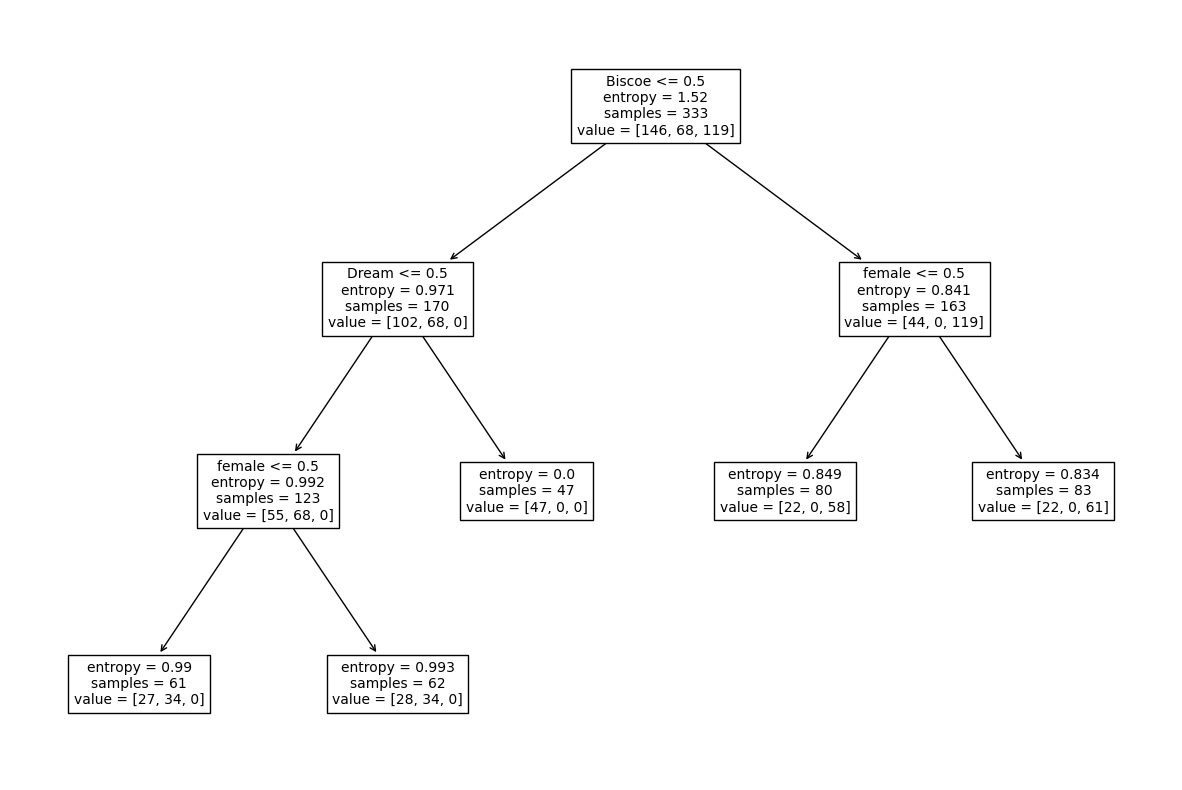

In [22]:
# solution here
import matplotlib.pyplot as plt

X = discrete_penguin_dataset[['female', 'male', 'Biscoe', 'Dream', 'Torgersen']]
y = discrete_penguin_dataset['species']
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X, y)

fig, ax = plt.subplots(figsize=(15, 10))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=['male', 'female', 'Biscoe', 'Torgersen', 'Dream'])
plt.show()

9. Create the function `predict_discrete` that would predict the value of an instance using the output dictionary from the `id3` function. (*Hint*: you can check the class of an object using the `isinstance` function.)

In [23]:
def predict_discrete(tree, test_instance):
    # print(test_instance)
    while True:
        node = next(iter(tree))
        value = test_instance[node]
        tree = tree[node]['value'][value]

        if isinstance(tree, np.int64) or isinstance(tree, np.int32):
            break
    return tree


predict_discrete(id3_result, discrete_penguin_dataset.iloc[234])

3

10. Predict the label for the first record from the dataset. (*Hint*: use the Pandas method `iloc`.)

In [24]:
# solution here
predict_discrete(id3_result, discrete_penguin_dataset.iloc[1])

1

11. Create the function `evaluate_discrete` that should return the accuracy of the model on a given set of records.

In [25]:
def evaluate_discrete(tree, test_data):
    count_good_predicts = 0
    for index in range(len(test_data)):
        predict = predict_discrete(id3_result,test_data.iloc[index])
        if predict == test_data.iloc[index]['species']:
            count_good_predicts += 1
    print(count_good_predicts)
    return (count_good_predicts/len(test_data))


12. Test the accuracy of the model on the whole penguin dataset.

In [26]:
# solution here
evaluate_discrete(id3_result, discrete_penguin_dataset)

234


0.7027027027027027

13. Is the accuracy of the model 100%? If yes, why? If no, why?

*Answer here:* Accuracy of the model is 0.7027027027027027 because there were only 234 good predictions. Also there were some inconsistent within the data after it was filtered ( removed some columns )

## IV. Decision Tree - the continuous case (3 points; bonus 0.1 points per week)

*Note*: For this case all features will be treated as being continuous. Use the entire `penguin_dataset`!

1. In order to include the continuous random variables in the decision trees, we need to discretise them. For that, we will use thresholds.

A threshold will appear between two consecutive values of the same feature that have different labels (label = the value of the target attribute).

Write a function `get_thresholds` that finds the thresholds for a continuous feature. The function takes three arguments: the dataset, the continuous feature and the target feature that contains the labels.

In [27]:
continuous_penguin_dataset = penguin_dataset.drop(columns=(discrete_penguin_dataset.drop(columns=['species'])).columns)

def get_thresholds(dataset, feature, target_feature):
    dataset = dataset.sort_values(by=[feature]).reset_index(drop=True)
    data = set()
    for index in range(len(dataset)):
        data.add((dataset[feature][index], int(dataset[target_feature][index])))

    data = list(sorted(data, key=lambda x: x[0]))
    grouped = dict()
    for d in data:
        if d[0] not in grouped:
            grouped[d[0]] = {d[1]}
        else:
            grouped[d[0]].add(d[1])

    thresholds = list()
    previous = -1
    for d in grouped:
        if previous != -1:
            if len(grouped[d]) > 1 or len(grouped[previous]) > 1:
                thresholds.append( (d + previous) / 2 )
            elif grouped[d] != grouped[previous]:
                thresholds.append( (d + previous) / 2 )
        previous = d

    return sorted(list(thresholds))

2. Find the thresholds for the attribute `flipper_length_mm`.

In [28]:
# solution here
get_thresholds(penguin_dataset, 'flipper_length_mm', 'species')
#get_thresholds(penguin_dataset, 'female', 'species')

[177.0,
 179.0,
 180.5,
 181.5,
 184.5,
 185.5,
 186.5,
 187.5,
 188.5,
 189.5,
 190.5,
 191.5,
 192.5,
 193.5,
 194.5,
 195.5,
 196.5,
 197.5,
 198.5,
 199.5,
 200.5,
 201.5,
 202.5,
 204.0,
 205.5,
 206.5,
 207.5,
 208.5,
 209.5,
 210.5,
 211.5,
 212.5]

3. Find the best threshold for the attribute `flipper_length_mm` using the information gain.

In [29]:
# solution here
def best_thresholds(dataset, feature, target_feature):
    thresholds = get_thresholds(dataset, feature, target_feature)
    prob_target = generate_probabilities(list(dataset[target_feature]))
    target_entropy = calculate_entropy( generate_probabilities( list(dataset[target_feature]) ) )
    ig = list()

    for threshold in thresholds:
        lower = dataset[dataset[feature] <= threshold].reset_index(drop=True)
        higher = dataset[dataset[feature] > threshold].reset_index(drop=True)

        entropy_lower = calculate_entropy(generate_probabilities(list(lower[target_feature])))
        entropy_higher = calculate_entropy(generate_probabilities(list(higher[target_feature])))
        entropy = len(lower)/len(dataset) * entropy_lower + len(higher)/len(dataset) * entropy_higher

        ig.append((threshold, target_entropy - entropy, feature))

    if len(ig) == 0:
        return (-1, target_entropy, feature)

    return max(ig, key=lambda x: x[1])

best_thresholds(penguin_dataset, 'flipper_length_mm', 'species')

(206.5, 0.8065245715639435, 'flipper_length_mm')

4. Find the best feature and the best threshold to be used as root for the decision tree using the information gain.

In [30]:
# solution here
def best_feature(dataset):
    best_ig_feature = list()
    
    for feature in dataset:
        if feature != 'species':
            threshold = best_thresholds(dataset, feature, 'species')
            best_ig_feature.append( threshold )

    return max(best_ig_feature, key=lambda x: x[1])

best_feature(penguin_dataset)

(206.5, 0.8065245715639435, 'flipper_length_mm')

5. Let's suppose that the root node is "flipper_length_mm" and the threshold 206.5. Create the variable `filtered_dataset` that should store the sub-tree for `flipper_length_mm < 206.5`. Do not drop the column if there are any other thresholds for the same attribute.

In [31]:
def filter_continous(dataset, feature, threshold):
    filtered_low = dataset[dataset[feature] < threshold].reset_index(drop=True)
    filtered_high = dataset[dataset[feature] >= threshold].reset_index(drop=True)

    if get_thresholds(filtered_low, feature, 'species') == []:
        filtered_low = filtered_low.drop(columns=[feature])

    if get_thresholds(filtered_high, feature, 'species') == []:
        filtered_high = filtered_high.drop(columns=[feature])

    # print(best_thresholds(filtered_high, 'bill_depth_mm','species'))
    # print(best_feature(filtered_high))

    return (filtered_low, filtered_high)

filter_continous(penguin_dataset, 'flipper_length_mm', 206.5)

(     female  male  Biscoe  Dream  Torgersen  bill_length_mm  bill_depth_mm  \
 0       0.0   1.0     0.0    0.0        1.0            39.1           18.7   
 1       1.0   0.0     0.0    0.0        1.0            39.5           17.4   
 2       1.0   0.0     0.0    0.0        1.0            40.3           18.0   
 3       1.0   0.0     0.0    0.0        1.0            36.7           19.3   
 4       0.0   1.0     0.0    0.0        1.0            39.3           20.6   
 ..      ...   ...     ...    ...        ...             ...            ...   
 203     1.0   0.0     0.0    1.0        0.0            46.8           16.5   
 204     1.0   0.0     0.0    1.0        0.0            45.7           17.0   
 205     1.0   0.0     0.0    1.0        0.0            43.5           18.1   
 206     0.0   1.0     0.0    1.0        0.0            49.6           18.2   
 207     1.0   0.0     0.0    1.0        0.0            50.2           18.7   
 
      flipper_length_mm  body_mass_g  species  
 0

6. Create a function `id3_continuous` that runs the ID3 algorithm for the continuous case.

The output dictionary should have the same structure, with the following differences:
- the name of the root and of the internal nodes will not be just `feature name`, but `feature_name<threshold_value`.
- the keys of the "values" dictionary will be just "YES" (when the condition `feature<threshold` is met) and "NO" (otherwise)

You have an example in [output_example_continuous.txt](data/output_example_continuous.txt) file.


*Notes*: 
- Do NOT delete the chosen attribute if it has more than one threshold.

In [32]:
def id3_continuous(dataset):
    target = dataset.columns[ len(dataset.columns) - 1]
    total_entropy = calculate_entropy( generate_probabilities( list(dataset[target])) )

    # check if final state
    if total_entropy == 0:
        return dataset.loc[0, 'species']

    # compute observation
    observation = dict()
    for value in np.unique(list(dataset[target])):
        observation[value] = list(dataset[target]).count(value)

    if len(dataset.columns) == 1:
        return max(observation, key=observation.get)

    # get maximum ig and column name
    max_gain = best_feature(dataset)
    dictionary = dict()
    dictionary['observation'] = observation
    dictionary['total_entropy'] = total_entropy
    dictionary['value'] = dict()

    text = max_gain[2] + ' < ' + str(max_gain[0])

    if max_gain[0] == -1:
        dictionary['value']['YES'] = dataset.loc[0, 'species']
        dictionary['value']['NO'] = dataset.loc[ len(dataset) - 1 , 'species']
    else:
        filter = filter_continous(dataset, max_gain[2], max_gain[0])

        if len(filter[1]) == 0:
            dictionary['value']['NO'] = dataset.loc[0, 'species']
        else:
            dictionary['value']['NO'] = id3_continuous(filter[1])

        if len(filter[0]) == 0:
            dictionary['value']['YES'] = dataset.loc[0, 'species']
        else:
            dictionary['value']['YES'] = id3_continuous(filter[0])
    
    return {text: dictionary}

pprint(id3_continuous(penguin_dataset))

{'flipper_length_mm < 206.5': {'observation': {1: 146, 2: 68, 3: 119},
                               'total_entropy': 1.5200835543530915,
                               'value': {'NO': {'Biscoe < 0.5': {'observation': {1: 2,
                                                                                 2: 5,
                                                                                 3: 118},
                                                                 'total_entropy': 0.3596921222690145,
                                                                 'value': {'NO': 3,
                                                                           'YES': {'female < -1': {'observation': {1: 2,
                                                                                                                   2: 5},
                                                                                                   'total_entropy': 0.863120568566631,
                                 

7. Run the continuous version of ID3 algorithm on the `penguin_dataset` and store the tree in the variable `id3_continuous_result`. Print the tree. For a better visualisation, you can use `pprint`.

In [33]:
id3_continuous_result = id3_continuous(penguin_dataset)

8. Run the ID3 implemenation from `sklearn` and plot the decision tree. Compare the results. (*Hint*: `plt.subplots` has a parameter named `figsize` where you can control the width and the height of the plot; (25,10) should be enough.)

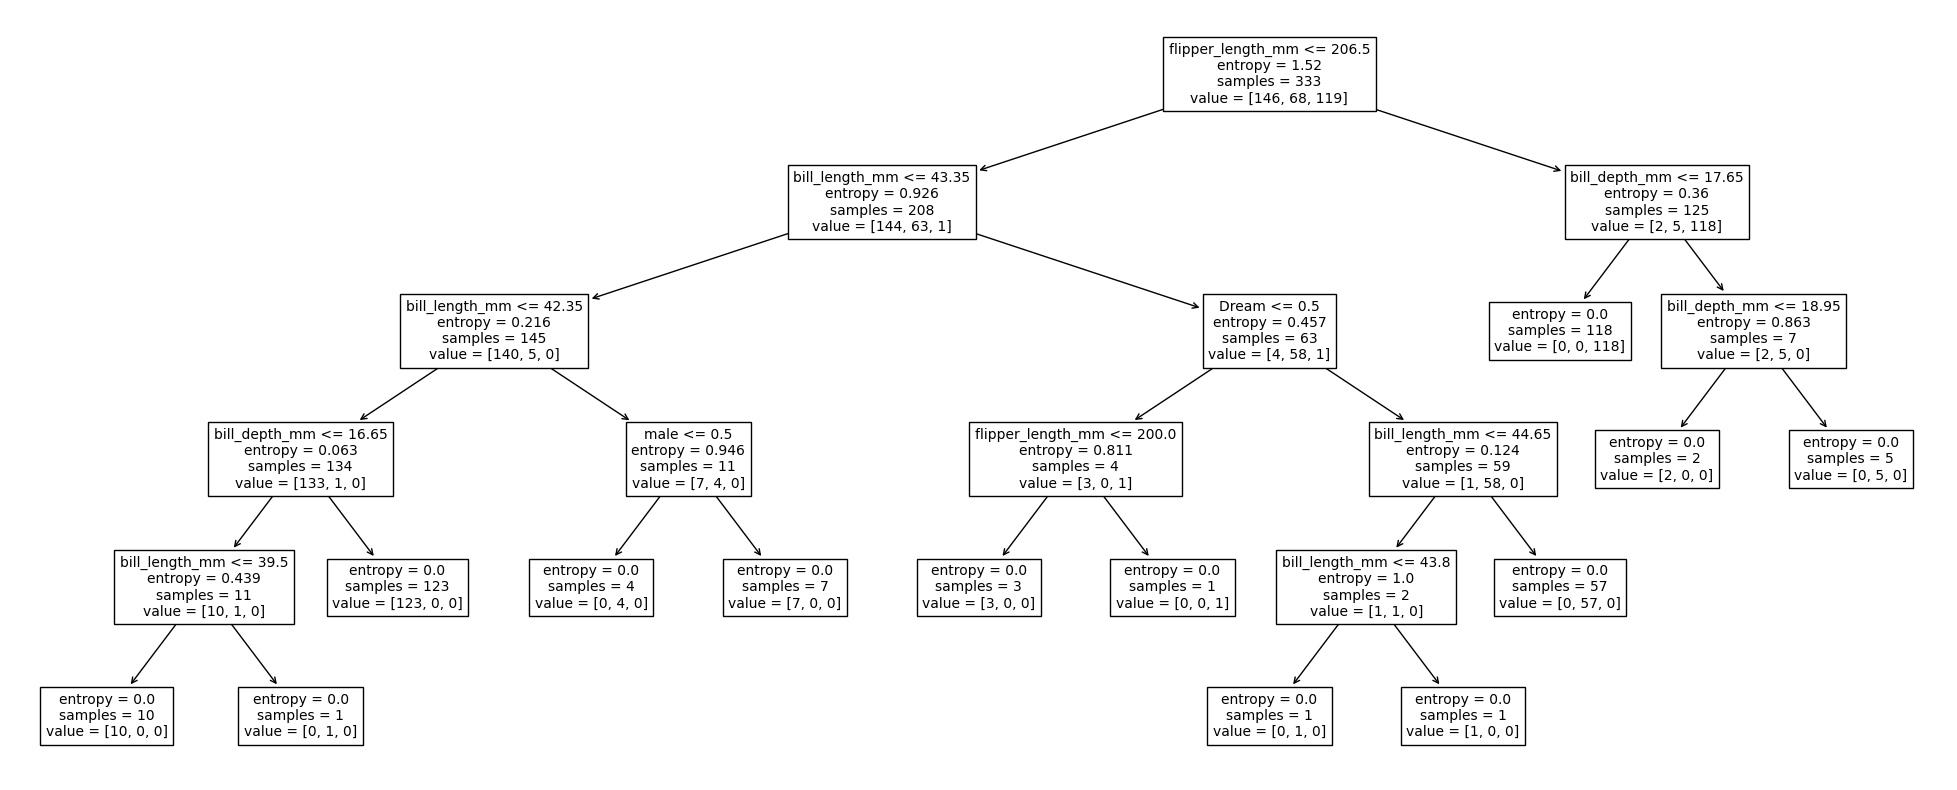

In [34]:
X = penguin_dataset[['female', 'male', 'Biscoe', 'Dream', 'Torgersen', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguin_dataset['species']
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X, y)

fig, ax = plt.subplots(figsize=(25, 10))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names=[ 'female', 'male', 'Biscoe', 'Dream', 'Torgersen', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.show()

9. Create the function `predict_continuous` that would predict the value of an instance using the output dictionary from the `id3` function. (*Hint*: the `split` method separates a string by a character)

In [35]:
def predict_continuous(tree, test_instance):
    # print(test_instance)
    while True:
        node = next(iter(tree))
        value = test_instance[node]
        tree = tree[node]['value'][value]

        if type(tree) != dict:
            break
    return tree


print(predict_continuous(id3_result, discrete_penguin_dataset.iloc[234]))
print(penguin_dataset.loc[234,'species'])

3
3


10. Predict the label for the first record from the dataset.

In [36]:
# solution here
print(predict_continuous(id3_result, discrete_penguin_dataset.iloc[0]))
print(penguin_dataset.loc[0,'species'])

1
1


11. Create the function `evaluate_continuous` that should return the accuracy of the model on a given set of records.

In [41]:
def evaluate_continuous(tree, test_data):
    count_good_predicts = 0
    for index in range(len(test_data)):
        predict = predict_continuous(id3_continuous_result,test_data.iloc[index])
        if predict == test_data.iloc[index]['species']:
            count_good_predicts += 1
    print(count_good_predicts)
    return (count_good_predicts/len(test_data))

12. Test the accuracy of the model on the whole penguin dataset.

In [42]:
# solution here
evaluate_continuous(id3_continuous, penguin_dataset)

KeyError: 'flipper_length_mm < 206.5'

13. Modify the `id3_continuous` function so it will allow pruning. (*Hint*: use a second parameter, `max_depth` to control the number of tree levels,)

In [39]:
def id3_continuous_prunned(dataset, max_depth = -1):
    target = dataset.columns[ len(dataset.columns) - 1]
    total_entropy = calculate_entropy( generate_probabilities( list(dataset[target])) )

    if max_depth != -1:
        max_depth = max_depth - 1

    if len(dataset) == 0:
        return 2

    # check if final state
    if total_entropy == 0:
        return dataset.loc[0, 'species']

    # compute observation
    observation = dict()
    for value in np.unique(list(dataset[target])):
        observation[value] = list(dataset[target]).count(value)

    if len(dataset.columns) == 1:
        return max(observation, key=observation.get)

    # get maximum ig and column name
    max_gain = best_feature(dataset)
    dictionary = dict()
    dictionary['observation'] = observation
    dictionary['total_entropy'] = total_entropy
    dictionary['value'] = dict()

    text = max_gain[2] + ' < ' + str(max_gain[0])


    # prunning
    if max_depth == 0:
        return max(observation, key=observation.get)

    if max_gain[0] == -1:
        dictionary['value']['YES'] = dataset.loc[0, 'species']
        dictionary['value']['NO'] = dataset.loc[ len(dataset) - 1 , 'species']
    else:
        filter = filter_continous(dataset, max_gain[2], max_gain[0])

        if len(filter[1]) == 0:
            dictionary['value']['NO'] = dataset.loc[0, 'species']
        else:
            dictionary['value']['NO'] = id3_continuous_prunned(filter[1], max_depth)

        if len(filter[0]) == 0:
            dictionary['value']['YES'] = dataset.loc[0, 'species']
        else:
            dictionary['value']['YES'] = id3_continuous_prunned(filter[0],  max_depth)
    
    return {text: dictionary}

14. Apply the prunned version of ID3 (using the custom and the `sklearn` implementation) with `max_depth = 2`. Compare the results.

{'flipper_length_mm < 206.5': {'observation': {1: 146, 2: 68, 3: 119},
                               'total_entropy': 1.5200835543530915,
                               'value': {'NO': {'Biscoe < 0.5': {'observation': {1: 2,
                                                                                 2: 5,
                                                                                 3: 118},
                                                                 'total_entropy': 0.3596921222690145,
                                                                 'value': {'NO': 3,
                                                                           'YES': 2}}},
                                         'YES': {'bill_length_mm < 43.35': {'observation': {1: 144,
                                                                                            2: 63,
                                                                                            3: 1},
                         

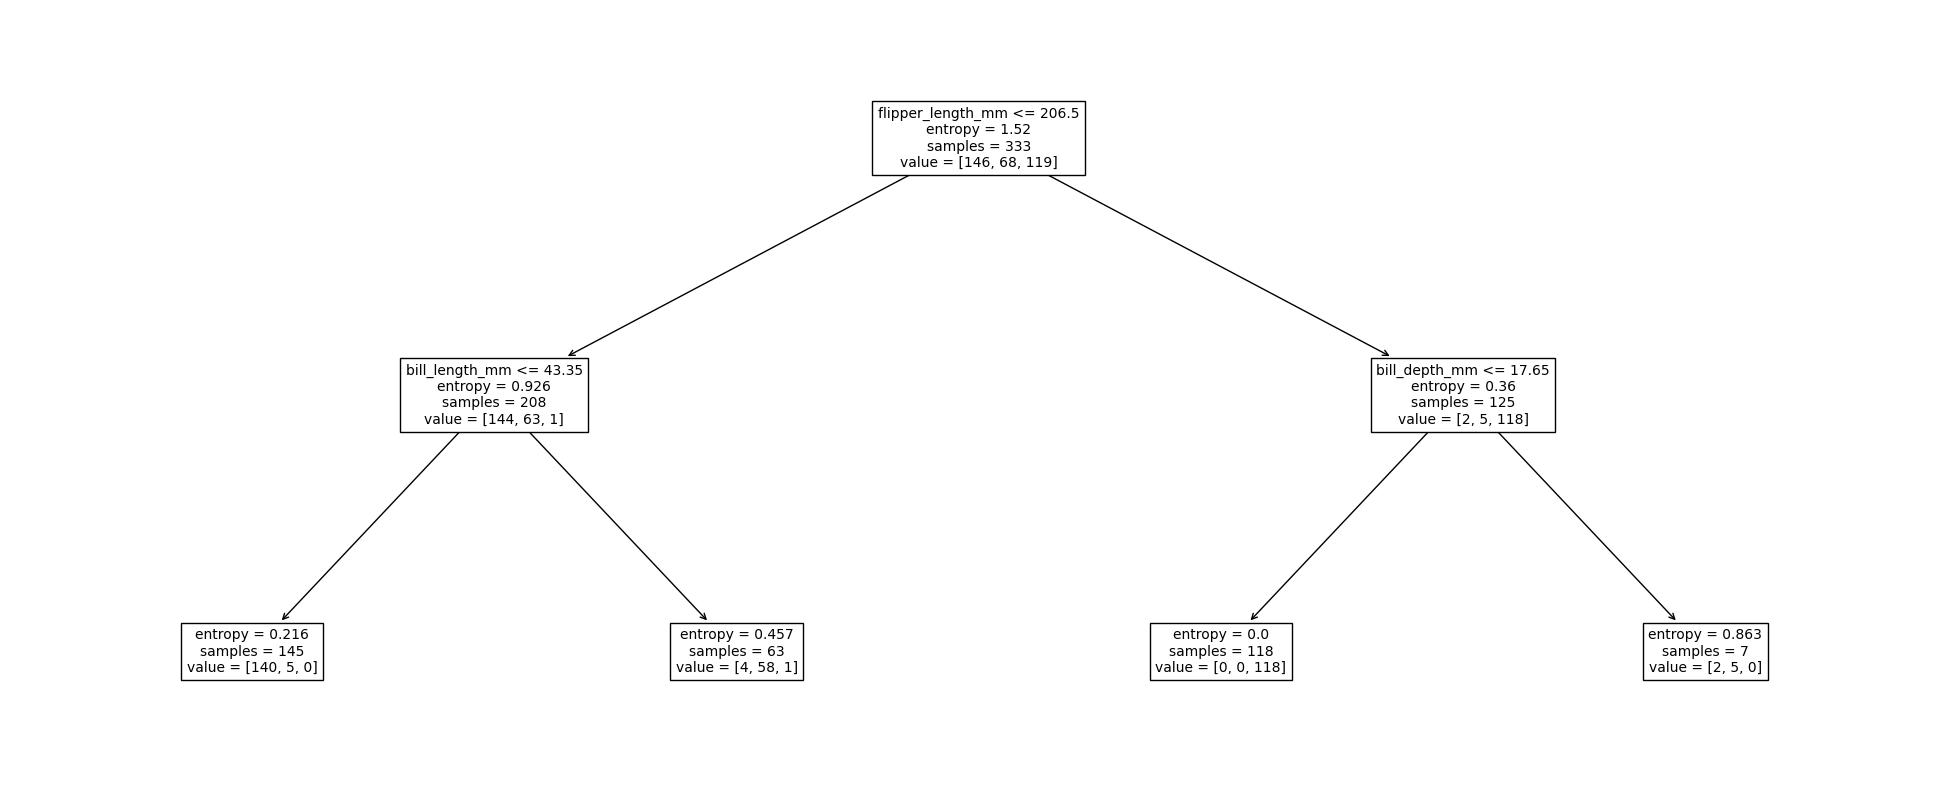

In [40]:
# solution here
pprint(id3_continuous_prunned(penguin_dataset, 3))

dt_prunned = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X, y)
fig, ax = plt.subplots(figsize=(25, 10))
f = tree.plot_tree(dt_prunned, ax=ax, fontsize=10, feature_names=X.columns)
plt.show()

# Points grading

| Section | Exercise | Points |
| --- | --- | --- |
| I | 1 | 0.2 |
| I | 2 | 0.2 |
| I | 3 | 0.2 |
| I | 4 | 0.2 |
| I | 5 | 0.2 |
| II | 1 | 0.4 |
| II | 2 | 0.1 |
| II | 3 | 0.4 |
| II | 4 | 0.1 |
| II | 5 | 0.7 |
| II | 6 | 0.5 |
| II | 7 | 0.1 |
| II | 8 | 0.2 |
| III | 1 | 0.1 |
| III | 2 | 0.2 |
| III | 3 | 0.1 |
| III | 4 | 0.3 |
| III | 5 | 0.1 |
| III | 6 | 1.3 |
| III | 7 | 0.1 |
| III | 8 | 0.5 |
| III | 9 | 0.3 |
| III | 10 | 0.1 |
| III | 11 | 0.1 |
| III | 12 | 0.1 |
| III | 13 | 0.2 |
| IV | 1 | 0.5 |
| IV | 2 | 0.1 |
| IV | 3 | 0.15 |
| IV | 4 | 0. 2 |
| IV | 5 | 0. 05 |
| IV| 6 | 0.5 |
| IV | 7 | 0.1 |
| IV | 8 | 0.3 |
| IV | 9 | 0.3 |
| IV | 10 | 0.1 |
| IV | 11 | 0.1 |
| IV | 12 | 0.1 |
| IV | 13 | 0.3 |
| IV | 14 | 0.2 |
